In [51]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading data
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
#checking the shape of dataset
data.shape

(30, 17)

In [5]:
#checking the null value in each column
data.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [6]:
#checking the datatype of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [7]:
#checking the data value means min, max, mean, standard deviation etc
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


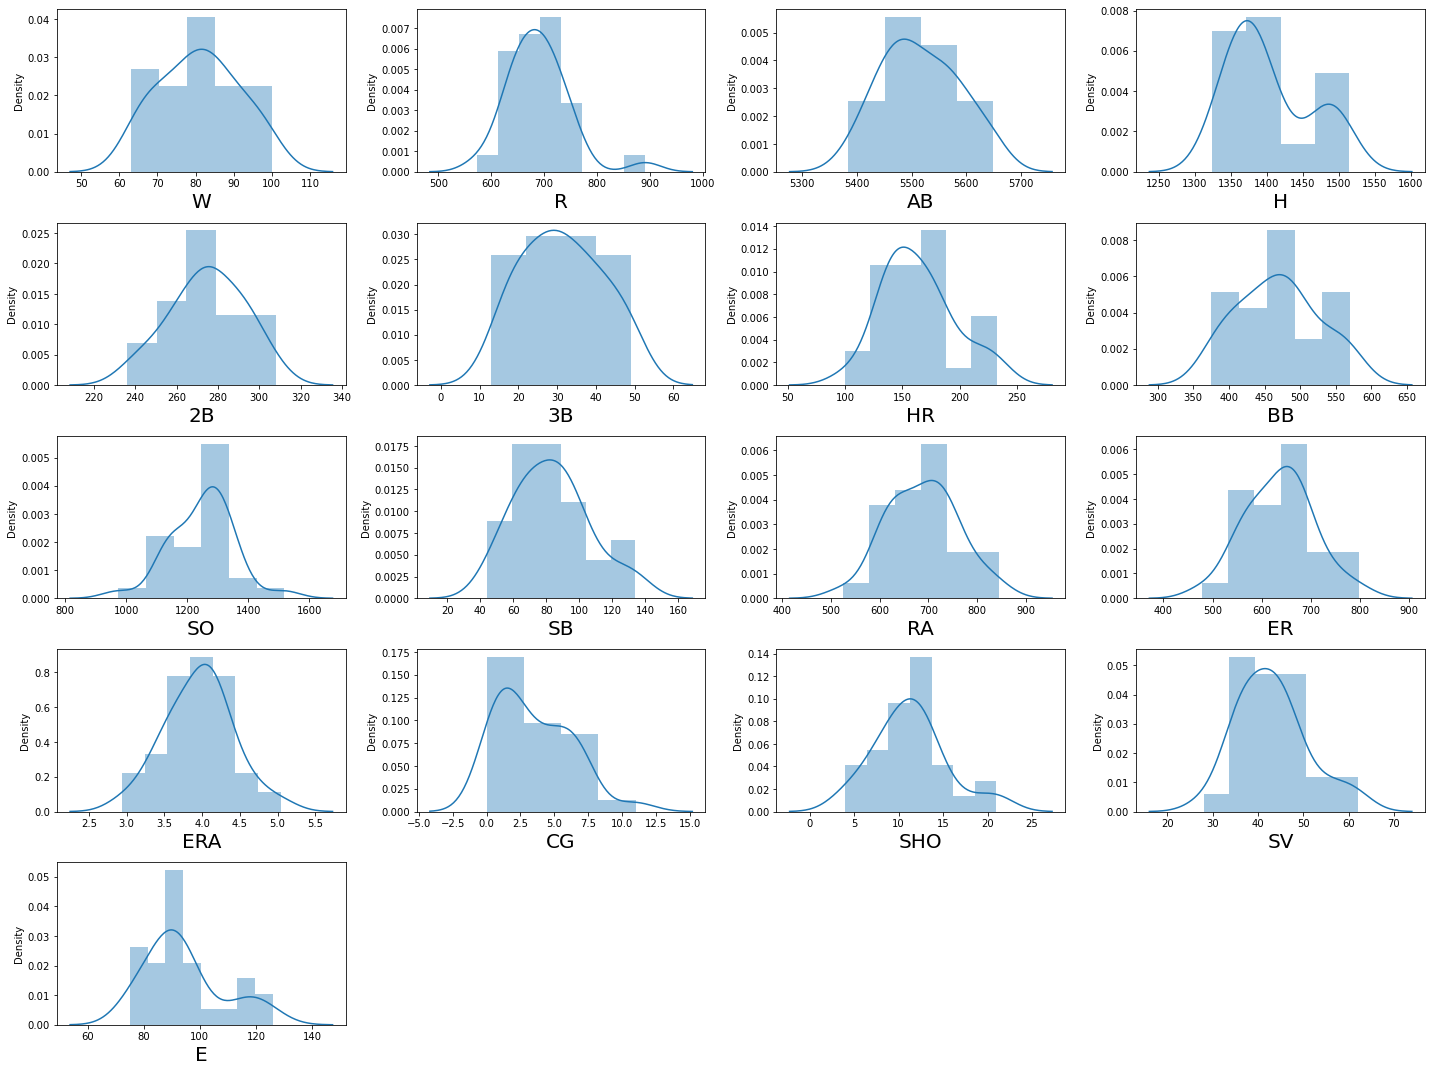

In [9]:
#visualizing the data
plt.figure(figsize=(20,15))
plotnumber=1
for column in data:
    if plotnumber <=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [11]:
#divide dataset into features and label
y=data['W']
x=data.drop(columns=['W'])
y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [12]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


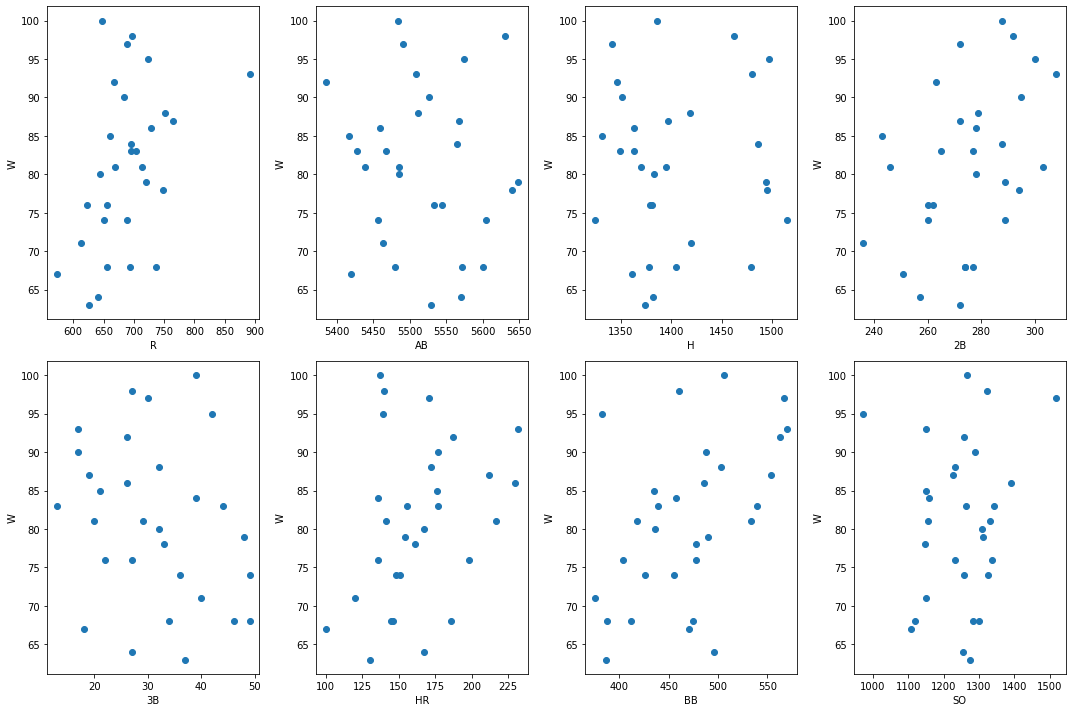

In [13]:
#visualizing relationship
plt.figure(figsize=(15,10))
plotnumber=1
for column in x:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel("W",fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [ ]:
#All are contributing more or less

In [15]:
#checking multicollinearity problem
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [19]:
x_scaled

array([[ 0.61907797,  0.84773126,  1.66368512,  1.42017307,  1.04119304,
        -0.7872986 , -1.53490242, -2.69762957,  0.91388329, -0.66623393,
        -0.50511008, -0.50695519, -0.5398062 , -0.81462859,  1.67160651,
        -0.46146963],
       [ 0.13443166, -0.71109353, -0.97068076,  0.12740339,  1.23580856,
        -0.24396668, -0.5365919 ,  0.15487844, -0.60182558,  0.16597077,
         0.24892985,  0.25459752, -0.5398062 ,  0.1728    ,  0.24987932,
        -0.60719689],
       [-0.33290586, -1.1152333 , -0.15189137,  1.58879521, -0.22380785,
        -0.7233772 ,  1.13914361, -0.89398189,  0.11144918, -0.68033909,
        -0.75162313, -0.64134684,  2.77264091, -0.32091429, -0.65485616,
        -1.11724227],
       [-1.14641931,  0.24152162, -0.40108814, -0.82812203, -0.41842337,
        -0.8831807 , -1.16053598, -0.16860185, -0.69098493,  0.18007593,
         0.10392217,  0.05301004,  1.3004422 , -0.56777144, -0.78410408,
         0.48575751],
       [ 0.01327008,  1.28073815,  1

In [20]:
#split data into train & test. Model will be built on training data & tested on test data
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=123)
y_train.head()

11    86
23    67
18    68
4     74
3     76
Name: W, dtype: int64

In [21]:
#Model instantiating and training
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [23]:
#we are building model to predict the chances of win
data.tail(3)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [24]:
#now we have already fit the scaler, we can transform the data
print("Chance of win is:",regression.predict(scaler.transform([[720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86]])))

Chance of win is: [85.15230468]


In [25]:
#we can save the model and later we can use it for prediction
#saving the model to the local file system
pickle.dump(regression,open('reg_model',"wb"))

In [28]:
#prediction using the saved model
loaded_model=pickle.load(open("reg_model",'rb'))
a=loaded_model.predict(scaler.transform([[650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92]]))
a

array([73.96521253])

In [30]:
#lets try in new window with only pickle model
scaler.transform([[650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92]])

array([[-0.661773  , -0.85542916, -1.415675  , -0.82812203,  0.45734648,
        -0.49965229, -0.76834256,  0.77243172, -0.06686951,  0.60323086,
         0.27793138,  0.29939474, -0.90785587, -1.30834289, -0.26711238,
        -0.17001513]])

In [31]:
#check how well model fits on train data
regression.score(x_train,y_train)

0.9869242049988771

In [32]:
#check how well model fits on test data
regression.score(x_test,y_test)

0.3589082591185693

In [33]:
#lets plot and visualize
y_pred=regression.predict(x_test)
y_pred

array([80.77369369, 68.4353329 , 96.67171822, 90.58388436, 89.64265145,
       85.15230468, 80.84397795, 86.90916182])

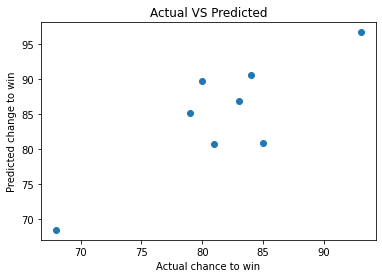

In [35]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual chance to win")
plt.ylabel("Predicted change to win")
plt.title("Actual VS Predicted")
plt.show()

In [39]:
#model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = regression.predict(x_test)
y_pred

array([80.77369369, 68.4353329 , 96.67171822, 90.58388436, 89.64265145,
       85.15230468, 80.84397795, 86.90916182])

In [40]:
#mean absolute error
mean_absolute_error(y_test,y_pred)

4.347172722209303

In [41]:
#mean squared error
mean_squared_error(y_test,y_pred)

27.55692779945025

In [42]:
#root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

5.24946928740899

In [45]:
#regularization
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
#lassoCV
laCV=LassoCV(alphas=None,max_iter=100,normalize=True)
laCV.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [47]:
#best alpha parameter
alpha=laCV.alpha_
alpha

0.20370908799305393

In [48]:
#now see how well our data has fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.20370908799305393)

In [49]:
lasso_reg.score(x_test,y_test)

0.42522705651839354

In [53]:
np.arange(0.001,0.1,0.01)

array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091])

In [54]:
#RidgeCv will return best alpha and coeffficients after performing 10 cross validation
ridgeCV=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgeCV.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [55]:
ridgeCV.alpha_

0.011

In [57]:
ridge_model=Ridge(alpha=ridgeCV.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.011)

In [58]:
ridge_model.score(x_test,y_test)

0.335464200294068

In [ ]:
So lasso is giving the best result of 0.42 or 42%